In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%pwd

u'/home/eric/dev/projects/data_science/rossman_predictor'

In [9]:
#Partial code taken from (https://www.kaggle.com/mmourafiq/rossmann-store-sales/data-viz/notebook): 

train = pd.read_csv('data/train.csv')
#train = DataSet(train_data, target_column='y', id_column='id')
print(train[:5])
store = pd.read_csv('data/store.csv')
print(store[:5])
all_data = pd.merge(train, store, on='Store', how='left')
test = pd.read_csv('data/test.csv')
all_data['StateHoliday'][all_data['StateHoliday'] == 0 ] = '0'


   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  
   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a                 1270                          9   
1      2         a          a                  570                         11   
2      3         a          a                14130                         12   
3      4         c          c                  620                          9   
4     

/usr/local/lib/python2.7/dist-packages/pandas/io/parsers.py:1164: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [14]:
# a couple of statistics
print('number of stores: {}'.format(train.Store.size))

# count open stores by week day
print(train.groupby(['DayOfWeek']).sum())
print(all_data[['DayOfWeek', 'Open', 'Sales', 'Customers']].groupby(['DayOfWeek', 'Open']).agg([np.sum, np.mean, np.std]))

number of stores: 1017209
              Store       Sales  Customers    Open  Promo  SchoolHoliday
DayOfWeek                                                               
1          80821168  1130203012  117675012  137560  77760          34060
2          81344288  1020411930  110848063  143961  77580          36595
3          81345276   954962863  105117642  141936  77580          34636
4          81443338   911177709  101732938  134644  77580          34747
5          81443338   980555941  108384820  138640  77580          36235
6          80821168   846317735   95103854  144058      0           2724
7          80821168    29551433    5179426    3593      0           2724
                     Sales                            Customers               \
                       sum         mean          std        sum         mean   
DayOfWeek Open                                                                 
1         0              0     0.000000     0.000000          0     0.000000 

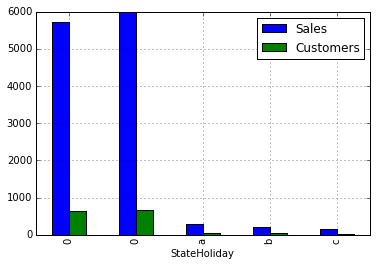

In [15]:
avg_stateholiday = all_data[['Sales', 'Customers', 'StateHoliday']].groupby('StateHoliday').mean()
avg_stateholiday.plot(kind='bar')

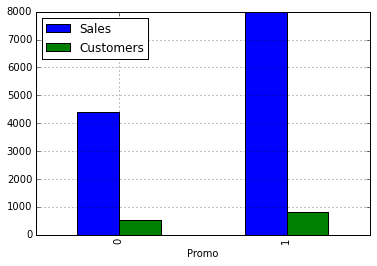

In [16]:
avg_promotion = all_data[['Sales', 'Customers', 'Promo']].groupby('Promo').mean()
avg_promotion.plot(kind='bar')

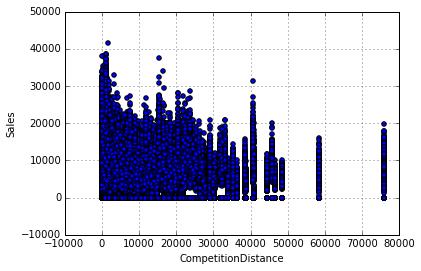

In [17]:
all_data[['CompetitionDistance', 'Sales']].plot(kind='scatter', x='CompetitionDistance', y='Sales')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc553139310>]], dtype=object)

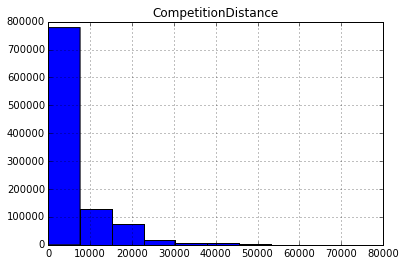

In [18]:
all_data.hist('CompetitionDistance')


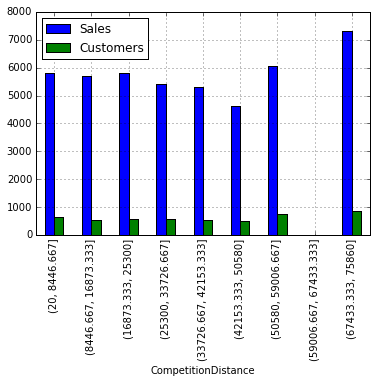

In [20]:
# Bin the competition distance with 10 bins
bins = np.linspace(all_data['CompetitionDistance'].min(), all_data.CompetitionDistance.max(), 10)

competition_bins = all_data[['Sales', 'Customers']].groupby(pd.cut(all_data['CompetitionDistance'], bins))
competition_avg = competition_bins.mean()
competition_avg.plot(kind='bar')